# London Weather Analysis from year 1979-2020

In [92]:
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
from scipy.stats import *
import statistics 


In [94]:
#Read the file to dataframe
df_L_weather = pd.read_csv('LondonWeatherData/london_weather.csv')

In [96]:
df_L_weather.dtypes

date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object

In [98]:
# Add a colum year to help in aggregation based on year.
df_L_weather['date'] = df_L_weather['date'].astype('str')
df_L_weather['year'] = df_L_weather['date'].str[0:4]


In [100]:
df_L_weather.head(2)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979


## Descriptive analysis of Weather data

In [103]:
df_L_weather.describe()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


## Function Definitions

In [106]:

def plot_histogram(df,cols,xlabel):
    '''
    Plots histograms 
    
    Input parameters:
    df : Dataframe with required values
    cols: List of columns for which the histogram will be plotted.
    xlabel : Label to be asigned to x axis.
    
    Output:
    Individual histograms for each column provided.
    
    '''
    lcol=len(cols)
    fig,ax = plt.subplots(nrows=1, ncols = lcol,figsize = (10,5), layout = 'constrained') #figsize=(8, 7)
    plt.style.use('ggplot')
    for i in range(lcol):
        ax[i].hist(df[cols[i]],label = cols[i],color = 'lightpink',edgecolor = 'black',bins = 5)
        ax[i].set_title(cols[i])
        ax[i].set_xlabel(xlabel[i])
        ax[i].set_ylabel("Frequency")

    plt.show()


In [108]:
def plot_line_graph(df_list,cols,xlabel,ylabel,title):
    '''
    Plots line graphs based on data.

    Input parametrs:
    df_list: List of dataframes to be considered
    cols: List of columns in the correspoding dataframes to be plotted.
    x_label: label to be given for x axis.
    y_label: label to be given to y axis.
    title: Title of line graph.

    Output:
    A Line Plot for each column given.
    '''
    fig,ax = plt.subplots(figsize = (12,5))
    plt.style.use('ggplot')
    for i,df in enumerate(df_list):
        ax.plot(df.index,df[cols[i]],label=cols[i])
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.xticks(rotation=90)
    plt.legend(loc ='upper right', bbox_to_anchor = (1,0.8))
    plt.grid(True)
    plt.title(title)
    
    plt.show()


In [110]:
def plot_heatmap(df,title):
    '''
    Plots heat map for a correlation matrix 

    Input parameters
    df: dataframe with correlation applied.
    title: title of the heatmap
    Output:
    Heatmap showing correlation between various factors.
        '''
    plt.figure(figsize = (10,8))
    sns.heatmap(df, cmap = 'coolwarm',vmin = -1, vmax = 1,annot = True )
    plt.title(title)
    plt.show()


## Data Aggregation based on year

In [113]:
#Creating dataframes with maximum temperature and minimum temperature and mean temperature recorded yearly.

#Get the maximum temperature recorded in each year
df_max_temp_yearly = df_L_weather.groupby('year').max(['max_temp'])[["max_temp"]].copy()
#Get the minimum temperature recorded in each year
df_min_temp_yearly = df_L_weather.groupby('year').min(['min_temp'])[["min_temp"]].copy()
#Get the mean temperature recorded in each year
df_mean_temp_yearly = df_L_weather.groupby('year').mean(['mean_temp'])[["mean_temp"]].copy()

print("\nLowest Temperature recorded: \n",df_min_temp_yearly[df_min_temp_yearly['min_temp']==df_min_temp_yearly['min_temp'].min()][["min_temp"]])
print("\nHighest temeperature recorded:\n",df_max_temp_yearly[df_max_temp_yearly['max_temp']==df_max_temp_yearly['max_temp'].max()][["max_temp"]])
print("\nLowest Mean temperature recorded:\n",df_mean_temp_yearly[df_mean_temp_yearly['mean_temp']==df_mean_temp_yearly['mean_temp'].min()][["mean_temp"]])
print("\nHighest Mean temperature recorded: \n",df_mean_temp_yearly[df_mean_temp_yearly['mean_temp']==df_mean_temp_yearly['mean_temp'].max()][["mean_temp"]])


Lowest Temperature recorded: 
       min_temp
year          
1981     -11.8

Highest temeperature recorded:
       max_temp
year          
2003      37.9
2019      37.9
2020      37.9

Lowest Mean temperature recorded:
       mean_temp
year           
1979   9.986575

Highest Mean temperature recorded: 
       mean_temp
year           
2020   12.70195


### Plot a Line graph showing the Maximum temperature ,minimum temperature and mean temperature recorded in each year

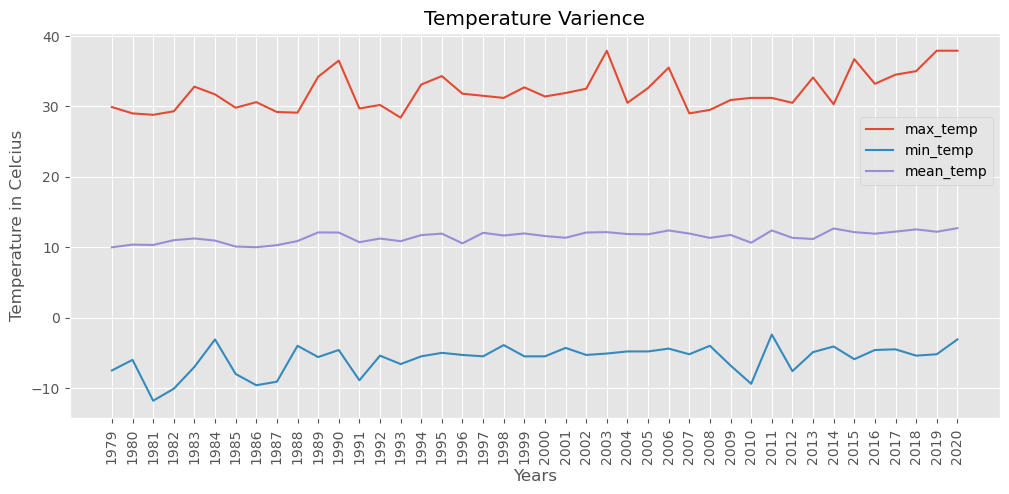

In [116]:
df_list = [df_max_temp_yearly,df_min_temp_yearly,df_mean_temp_yearly]
cols = ['max_temp','min_temp','mean_temp']
xlabel = 'Years'
ylabel = 'Temperature in Celcius'
title = 'Temperature Varience'
plot_line_graph(df_list,cols,xlabel,ylabel,title)
#plot_max_min_mean_yearly_temp(df_list,cols)

### Plot histograms for  each weather factors.

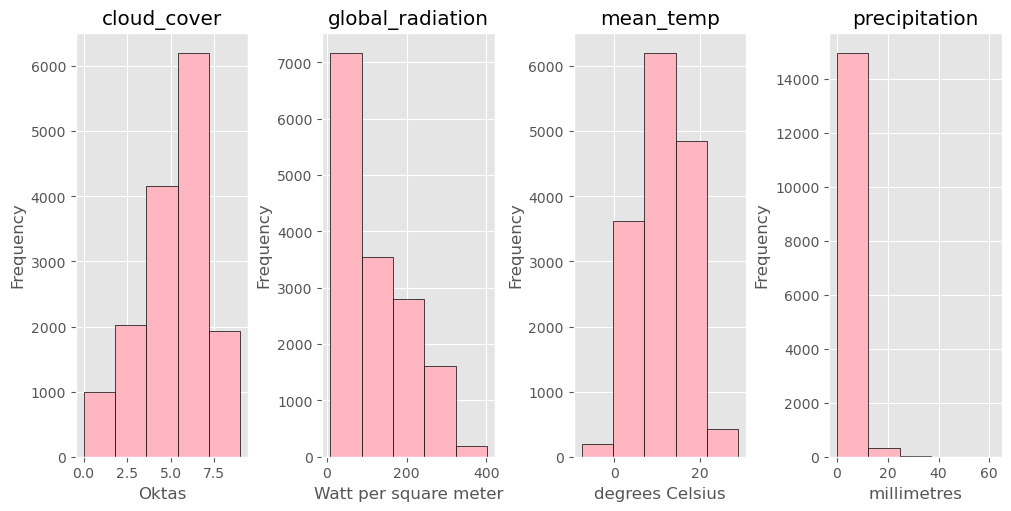

In [119]:

cols=['cloud_cover','global_radiation','mean_temp','precipitation']
xlabel = ['Oktas','Watt per square meter','degrees Celsius', 'millimetres' ]
plot_histogram(df_L_weather,cols,xlabel)


### Skew and Kurtosis for weather factors

In [122]:
df_skew_kurt_check = df_L_weather[['cloud_cover','global_radiation','mean_temp','precipitation']].copy()

In [124]:
df_skew_kurt_check.skew()

cloud_cover        -0.686842
global_radiation    0.658475
mean_temp          -0.013023
precipitation       4.449585
dtype: float64

In [126]:
df_skew_kurt_check.kurtosis()

cloud_cover         -0.271510
global_radiation    -0.663895
mean_temp           -0.656136
precipitation       31.960639
dtype: float64

### A dataframe created which represents yearly mean of various weather factors.

In [129]:
df_yearly_factors_mean = df_L_weather.groupby('year').mean(['cloud_cover','global_radiation','mean_temp','sunshine','precipitation'])[['cloud_cover','global_radiation','mean_temp','sunshine','precipitation']].copy()

In [131]:
df_yearly_factors_mean.head(2)

,cloud_cover,global_radiation,mean_temp,sunshine,precipitation
year,,,,,
1979,5.614085,112.591781,9.986575,3.896438,1.875890
1980,5.379781,114.704918,10.370492,4.142077,1.606831


### Plot a correlation matrix of the yearly mean of various weather factors available.

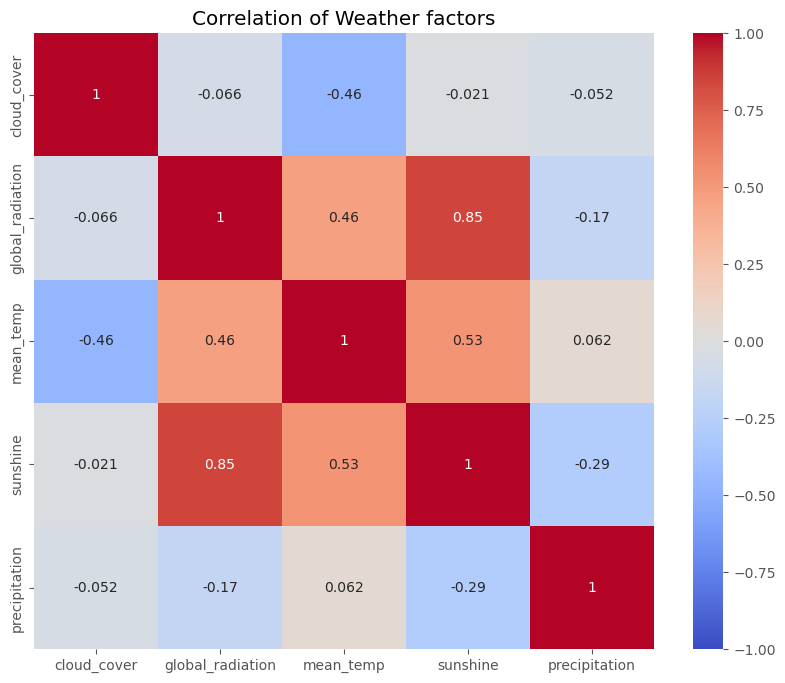

In [134]:
title = 'Correlation of Weather factors'
plot_heatmap(df_yearly_factors_mean.corr(),title)
